## Importing the libraries

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils import data
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms
import os
import json

In [ ]:

def dataloader_workers():
    """Use 4 processes to read the data."""
    return 2


def data_kmnist(batch_size, resize=None):
    """Download the KMNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.KMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.KMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=dataloader_workers()))
    

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

#ref : d2l


In [ ]:
#GPU with cuda for graphic processing
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 256
train_iter, test_iter = data_kmnist(batch_size)



  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/train-images-idx3-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/train-labels-idx1-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ../data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/KMNIST/raw



displaying the image show

torch.Size([256, 1, 28, 28])
tensor([5, 7, 7, 9, 1, 0, 1, 0, 1, 5, 6, 1, 6, 5, 5, 4, 2, 6, 9, 2, 2, 1, 9, 0,
        7, 2, 1, 2, 1, 4, 3, 0, 7, 1, 4, 5, 6, 2, 0, 4, 4, 0, 8, 3, 7, 8, 2, 1,
        5, 5, 2, 4, 9, 5, 0, 8, 4, 5, 1, 8, 9, 8, 4, 5, 8, 5, 5, 2, 9, 7, 7, 9,
        8, 2, 4, 4, 1, 1, 6, 8, 8, 6, 8, 4, 2, 5, 3, 3, 0, 2, 7, 7, 3, 2, 3, 5,
        5, 8, 7, 5, 3, 6, 6, 2, 3, 8, 5, 7, 5, 7, 7, 2, 0, 6, 4, 9, 3, 6, 4, 1,
        5, 0, 9, 9, 7, 3, 8, 6, 6, 3, 2, 4, 4, 0, 2, 1, 0, 7, 2, 3, 4, 4, 6, 8,
        4, 8, 2, 5, 1, 2, 4, 1, 5, 8, 8, 0, 8, 9, 7, 8, 0, 7, 7, 7, 5, 2, 8, 3,
        7, 3, 0, 3, 1, 8, 0, 5, 9, 6, 3, 2, 4, 6, 6, 2, 1, 5, 5, 7, 1, 3, 7, 9,
        6, 4, 7, 3, 2, 3, 2, 2, 4, 5, 8, 4, 7, 4, 4, 7, 1, 1, 9, 6, 9, 2, 5, 2,
        2, 2, 0, 1, 1, 2, 1, 5, 4, 8, 1, 4, 5, 2, 4, 9, 0, 7, 2, 7, 9, 4, 1, 0,
        9, 1, 6, 6, 0, 6, 5, 8, 9, 5, 8, 3, 9, 0, 5, 4])


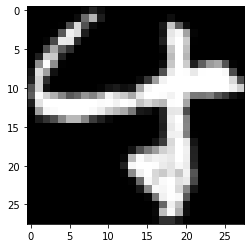

In [ ]:
X, y = next(iter(train_iter)) 
print(X.size())
print(y)
plt.imshow(X[25].reshape((28,28)),cmap="gray")
# ref : SR_concise

## Model deifinition and initialization

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, output, f_size, num_outputs): 
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs

       #stem
        self.Unfold = nn.Unfold(patches, padding=0, stride=patches)
        self.Stem = nn.Linear(num_inputs, f_size)

       #b1 and b2 backbone
        self.b1 = nn.Sequential (                  
            nn.Linear(f_size, output),
            nn.ReLU(),
            nn.Linear(output,  f_size)
        )
       
        self.b2 = nn.Sequential(
            nn.Linear(16, output),
            nn.ReLU(),
            nn.Linear(output, f_size)
        )

      
        self.classifier = nn.Linear(f_size, num_outputs)

#ref : lab 5
   

In [ ]:
    def forward(self, x):
        x = self.Unfold(x)
        x = x.transpose(1,2) 
        feature_matrix = self.Stem(x) 
        x = self.b1(feature_matrix) 
        x = x.transpose(1,2) 
        features = self.b2(x) 
        mean = torch.mean(features, 2)
        out = self.classifier(mean) 
        
        return out 

In [ ]:
patches = 7
f_size = 300
output = 256
num_inputs, num_outputs = patches*patches, 10
net = Net(num_inputs, output, f_size,  num_outputs).to(device)

To initialise in same way, having same type in multiple layers

In [ ]:
def weight(w):
    if isinstance(w, nn.Linear):
        torch.nn.init.normal_(w.weight, std=0.01)
        torch.nn.init.zeros_(w.bias)

net.apply(weight)
print(net)
#the alternative intialisation

Net(
  (Unfold): Unfold(kernel_size=7, dilation=1, padding=0, stride=7)
  (Stem): Linear(in_features=49, out_features=300, bias=True)
  (b1): Sequential(
    (0): Linear(in_features=300, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=300, bias=True)
  )
  (b2): Sequential(
    (0): Linear(in_features=16, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=300, bias=True)
  )
  (classifier): Linear(in_features=300, out_features=10, bias=True)
)


## Loss function and optimizer is created

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.5) 
# ref : lab 4

## Evaluating

In [ ]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)        
    cmp = (y_hat.type(y.dtype) == y) 
    return float(torch.sum(cmp)) 

In [ ]:
class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a __init__ on a dataset."""
    metric = Accumulator(2)  # prediction
    for _, (X, y) in enumerate(data_iter):
        X = X.to(device) #batches  dataset loaded to gpu
        y = y.to(device) 
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

#ref : d2l file

function is trained by first epoch

In [ ]:
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    # training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        
        X = X.to(device) 
        y = y.to(device) 
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

#ref: lab_4

In [ ]:
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(9.5, 4.5)):
      
        #  plotting line
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
            
        # arguments captured by use of lambda function
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

  
    def save_image(self, path):
      if not os.path.exists(path):
        os.mkdir(path)
      image_path = path + 'results.png'
      plt.savefig(image_path)

    def add(self, x, y):
     
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


#ref : d2l

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, epochs, optimizer): 
    """Train a __init__."""
    results = {}
    animator = Animator(xlabel='epoch', xlim=[1, epochs], ylim=[0.0, 1.25],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)

    
        results["epoch:"+str(epoch + 1)] = {"train acc":train_metrics[1], "test acc": test_acc, "train loss":train_metrics[0]} 
        print(results["epoch:"+str(epoch + 1)])
        animator.add(epoch + 1, train_metrics + (test_acc,))
        
    
    animator.save_image('./KMNIST_results/')
    train_loss, train_acc = train_metrics
    print(results)
    return results

#ref : lab 4&5

## Model training

{'epoch:1': {'train acc': 0.5692833333333334, 'test acc': 0.6206, 'train loss': 1.2094193515459697}, 'epoch:2': {'train acc': 0.8165833333333333, 'test acc': 0.7224, 'train loss': 0.5849223354657491}, 'epoch:3': {'train acc': 0.8733666666666666, 'test acc': 0.7644, 'train loss': 0.4123982070287069}, 'epoch:4': {'train acc': 0.9017166666666667, 'test acc': 0.7985, 'train loss': 0.31779492417971295}, 'epoch:5': {'train acc': 0.91925, 'test acc': 0.8291, 'train loss': 0.2626671815474828}, 'epoch:6': {'train acc': 0.9309833333333334, 'test acc': 0.8374, 'train loss': 0.22538402148485184}, 'epoch:7': {'train acc': 0.9400166666666666, 'test acc': 0.8578, 'train loss': 0.19417796889543534}, 'epoch:8': {'train acc': 0.9474666666666667, 'test acc': 0.8548, 'train loss': 0.17191094648838043}, 'epoch:9': {'train acc': 0.9514333333333334, 'test acc': 0.8634, 'train loss': 0.15686276185512543}, 'epoch:10': {'train acc': 0.95665, 'test acc': 0.8647, 'train loss': 0.14100545211633048}, 'epoch:11': {'

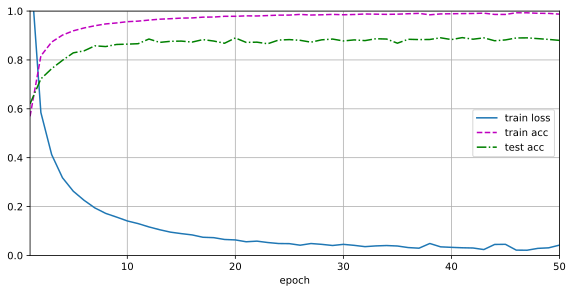

In [ ]:
epochs = 50
fn = train_ch3(net, train_iter, test_iter, loss, epochs, optimizer)

with open('results.json', 'w') as fp:
    json.dump(fn, fp)

    #ref : lab5

In [ ]:
evaluate_accuracy(net, test_iter)

0.8801